In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Let's start with importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using pandas read_csv() function to import the data.

In [6]:
# data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", delimiter="\t")
# data.head()

In [7]:
data = pd.read_csv("/content/marketing_campaign.csv", delimiter="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 24 missing values in the income column.
Dropping the rows with missing values would be a better approach.

In [9]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Let's visualize the income distribution of the customers.

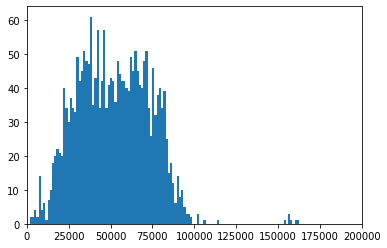

In [10]:
plt.hist(data["Income"],500)
plt.xlim(0,200000)
plt.show()

In [11]:
mean_income = np.mean(data["Income"])
std_dev_income = np.std(data["Income"])
print(mean_income-std_dev_income,mean_income+std_dev_income)
print(mean_income-2*std_dev_income,mean_income+2*std_dev_income)

27079.855179627644 77414.64752795358
1912.459005464676 102582.04370211656


68% of all the customers fall under the price range of \$27080 and $77415

---


95% of all the customers fall under the price range of \$1912 and \$102582

---



Let's analyse the expendture of customers

In [12]:
data["Expenditure"] = data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenditure
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422


Before proceeding to the clustering, we need to process the catergorical data

In [13]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
dic = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,'Absurd': 0, 'YOLO': 0, 'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
data=data.replace({'Marital_Status': dic, 'Education': dic}) 

In [15]:
print(data["Marital_Status"])

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Marital_Status, Length: 2216, dtype: int64


In [16]:
data["Dt_Customer"].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [17]:
data["year_joined"] = data["Dt_Customer"].str[6:]
data["year_joined"] = data["year_joined"].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [19]:
data['cmp']= data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']
data['cmp']= np.where(data['cmp'] > 0, 1, 0)

In [20]:
data['curr_year'] = 2021
data['age'] = data['curr_year']-data['Year_Birth']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [21]:
data['kid_teen'] = data['Kidhome'] + data['Teenhome']
data['kid_teen']= np.where(data['kid_teen'] > 0, 1, 0)

data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Expenditure', 'year_joined', 'cmp', 'curr_year', 'age', 'kid_teen'],
      dtype='object')

In [22]:
X = data[['Education', 'Marital_Status', 'Income', 'kid_teen',
       'Recency','Expenditure', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'cmp', 
       'Complain', 'age', 'year_joined']]
X.columns

Index(['Education', 'Marital_Status', 'Income', 'kid_teen', 'Recency',
       'Expenditure', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'cmp',
       'Complain', 'age', 'year_joined'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
type(X)

numpy.ndarray

Let's use Elbow method to obtain optimal number of clusters.

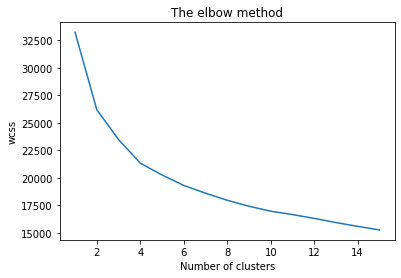

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 35)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [27]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 35)
y_kmeans = kmeans.fit_predict(X)

In [28]:
print(y_kmeans)

[1 0 1 ... 4 1 3]


In [29]:
#y_kmeans = pd.Series(y_kmeans)
print(type(y_kmeans))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


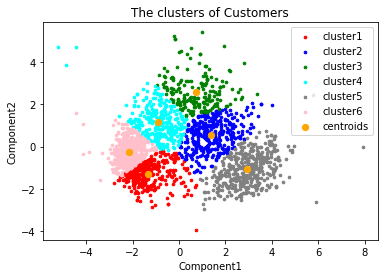

In [30]:
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans == 0, 1], s = 7, c = 'red', label='cluster1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans == 1, 1], s = 7, c = 'blue', label='cluster2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans == 2, 1], s = 7, c = 'green', label='cluster3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans == 3, 1], s = 7, c = 'cyan', label='cluster4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans == 4, 1], s = 7, c = 'gray', label='cluster5')
plt.scatter(X[y_kmeans ==5, 0], X[y_kmeans == 5, 1], s = 7, c = 'pink', label='cluster6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'orange', label = 'centroids')
plt.title('The clusters of Customers')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend()
plt.show()

# **Summary**
I have used K-Means clustering algorithm to categorise the customer data into 6 clusters for whom we know the buying patterns.<br>
**Advantages**<br>

*   Whenever a company launches a new product, the product can be marketed directly to the corresponding cluster members directly, therefore optimising the cost of marketing.
*   Every new customer can be assigned into an existing cluster thereby estimating the buying patterns of that specific customer and recommending products can be more effective.

